In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

# 나눔고딕 폰트 경로 설정
font_path = '/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/NanumGothic.ttf'

# 폰트 경로 추가
fm.fontManager.addfont(font_path)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'




In [10]:
df = pd.read_excel('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/인구밀도랑 방문자수.xlsx')

df = df[['광역지자체','전기차 개수','충전소 개수','사용량(키로와트시)', '인구밀도', '방문자 수', '목적지 검색 건수']]

df.rename(columns={'사용량(키로와트시)':'전력사용량'}, inplace=True)

df

,광역지자체,전기차 개수,충전소 개수,전력사용량,인구밀도,방문자 수,목적지 검색 건수
0,서울,59624,704,19436562,15560.7,583566567,81993936
1,인천,26342,209,6288558,2801.3,171685813,33258285
2,경기,77673,996,27808619,1344.9,621595670,180486842
3,강원,14065,289,12102816,90.8,156025438,49559584
4,충북,15156,229,9827635,219.4,112204083,16961354
5,충남,16617,234,10320353,265.9,164221467,26973043
6,대전,14450,163,6073732,2730.7,79723315,11273132
7,세종,3081,84,1496166,822.9,27478123,3540101
8,경북,19150,403,17079885,137.7,185372707,25507980
9,대구,24100,287,10261777,2673.7,103674970,14957249


<ipython-input-11-f5c30ace8bde>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


<Axes: >

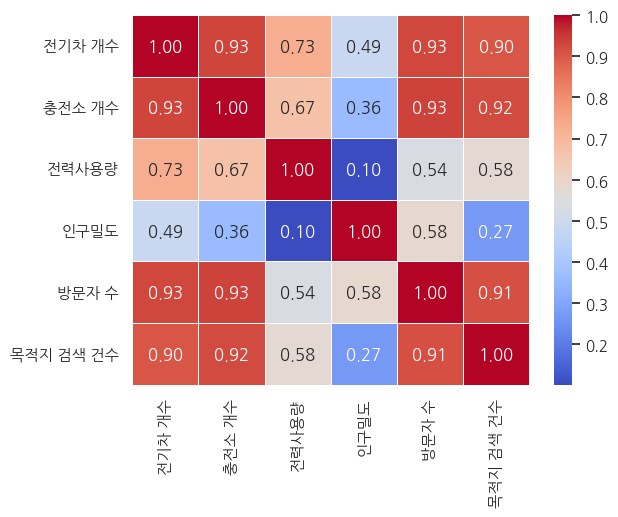

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [77]:
# '인구밀도' 열 삭제
df.drop('인구밀도', axis=1, inplace=True)

df

,광역지자체,전기차 개수,충전소 개수,사용량(키로와트시),방문자 수,목적지 검색 건수
0,서울,59624,704,19436562,583566567,81993936
1,인천,26342,209,6288558,171685813,33258285
2,경기,77673,996,27808619,621595670,180486842
3,강원,14065,289,12102816,156025438,49559584
4,충북,15156,229,9827635,112204083,16961354
5,충남,16617,234,10320353,164221467,26973043
6,대전,14450,163,6073732,79723315,11273132
7,세종,3081,84,1496166,27478123,3540101
8,경북,19150,403,17079885,185372707,25507980
9,대구,24100,287,10261777,103674970,14957249


In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

# PowerTransformer로 데이터 변환
transformer = PowerTransformer(method = 'box-cox')

# PCA로 차원 축소
pca = PCA(n_components= 1)

# 적용
for col in ['사용량(키로와트시)','방문자 수','목적지 검색 건수']:
  transformed_col = transformer.fit_transform(df[[col]])
  pca_result = pca.fit_transform(transformed_col)
  df[col] = pca_result

df.rename(columns={'사용량(키로와트시)':'전력사용량'}, inplace=True)

df

,광역지자체,전기차 개수,충전소 개수,전력사용량,방문자 수,목적지 검색 건수
0,서울,59624,704,-1.037612,-1.890356,-1.451877
1,인천,26342,209,0.517737,-0.466462,-0.533639
2,경기,77673,996,-1.601299,-1.956745,-2.178938
3,강원,14065,289,-0.345928,-0.343331,-0.951536
4,충북,15156,229,-0.060085,0.095395,0.217728
5,충남,16617,234,-0.126273,-0.409467,-0.306232
6,대전,14450,163,0.560799,0.574501,0.703323
7,세종,3081,84,2.089753,2.241756,2.213561
8,경북,19150,403,-0.842983,-0.563892,-0.244653
9,대구,24100,287,-0.118542,0.203978,0.364725


In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 입력과 출력 변수 분리
X = df[['전기차 개수', '전력사용량', '방문자 수', '목적지 검색 건수']]
y = df['충전소 개수']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 통한 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 테스트 데이터 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: %.2f" % mse)
print("R-squared: %.2f" % r2)

NameError: ignored

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 입력과 출력 변수 분리
X = df[['전기차 개수']]
y = df['전력사용량']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 새로운 전기차 개수로 전력 사용량 예측
new_electric_car_count = [[39524]]  # 입력 데이터를 2차원 배열로 변환
predicted_power_consumption = model.predict(new_electric_car_count)

print("전기차 개수 {}일 때 예상 전력 사용량: {}".format(new_electric_car_count[0][0], predicted_power_consumption[0]))

전기차 개수 39524일 때 예상 전력 사용량: -0.7854815573325756


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 입력과 출력 변수 분리
X = df[['전기차 개수']]
y = df['방문자 수']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
p_model = LinearRegression()
p_model.fit(X_train, y_train)

# 새로운 전기차 개수로 전력 사용량 예측
people_count = [[39524]]  # 입력 데이터를 2차원 배열로 변환
predicted_people_count = p_model.predict(people_count)

print("전기차 개수 {}일 때 방문자 수: {}".format(people_count[0][0], predicted_people_count[0]))

전기차 개수 39524일 때 방문자 수: -0.5670701125490266


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 입력과 출력 변수 분리
X = df[['방문자 수']]
y = df['목적지 검색 건수']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
s_model = LinearRegression()
s_model.fit(X_train, y_train)

# 새로운 전기차 개수로 전력 사용량 예측
search_count = [[-0.5670701125490266]]  # 입력 데이터를 2차원 배열로 변환
predicted_search_count = s_model.predict(search_count)

print("방문자 수 {}일 때 목적지 검색 건수: {}".format(search_count[0][0], predicted_search_count[0]))

방문자 수 -0.5670701125490266일 때 목적지 검색 건수: -0.6126917703254773


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [96]:
# 새로운 데이터로 이상적인 충전소 개수 예측
new_data = {
    '전기차 개수' : [20388,26769,33147,39524],
    '전력사용량' : [-0.002644215372799019,-0.2636854506908036, -0.5246039585827066, -0.7854815573325756],
    '방문자 수' : [0.16359709330585648, -0.080047735318726, -0.32357801536379516, -0.5670701125490266],
    '목적지 검색 건수' : [0.13285747621782137, -0.11574984726633362, -0.3642402890751316, -0.6126917703254773]
}

new_df = pd.DataFrame(new_data)

predicted_charging_stations = best_model.predict(new_df)

print("충전소 개수 예측 결과 :", predicted_charging_stations)


충전소 개수 예측 결과 : [273.46672222 328.50415079 369.64357937 392.54366667]


In [84]:
charging = [273.46672222 328.50415079 369.64357937 392.54366667]

